# Lab 1 Report

# Imports and General Functions

In [173]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import glob

def zeros(n):
    return [0] * n

def ascend_str(ls, idxs):
    idx = 0
    idx_slice = slice(idxs[0], idxs[1])  # make slice for desired indices
    while idx < len(ls):
        for i, x in enumerate(ls):
            if i > idx and int(x[idx_slice]) < int(ls[idx][idx_slice]):  # check for lowest integer at given indices
                ls[i], ls[idx] = ls[idx], x

        idx += 1
    return None

# Master Bias Frame

In [174]:
bias_frames = glob.glob('Lab1_data/d20[0-1][0-9].fits')

def bias(x):
    n = len(x)
    tot = zeros(n)

    for i, file in enumerate(x):
        arr = fits.getdata(file)
        tot[i] += arr
    sumtot = 0
    for j in tot:
        sumtot += j
    mean = sumtot/len(tot)
    return mean

biasdat = bias(bias_frames)

# Bias Subtraction

In [175]:
def bias_sub(x):
    n = len(x)
    tot = zeros(n)

    for i, file in enumerate(x):
        arr = fits.getdata(file)
        arr[i] = arr[i] - biasdat[i]
        tot[i] += arr
    return tot

frames = glob.glob('Lab1_data/d20[4-8][0-9].fits')
ascend_str(frames, (-7,-5))
frames

['Lab1_data/d2043.fits',
 'Lab1_data/d2044.fits',
 'Lab1_data/d2045.fits',
 'Lab1_data/d2046.fits',
 'Lab1_data/d2047.fits',
 'Lab1_data/d2048.fits',
 'Lab1_data/d2049.fits',
 'Lab1_data/d2050.fits',
 'Lab1_data/d2051.fits',
 'Lab1_data/d2052.fits',
 'Lab1_data/d2053.fits',
 'Lab1_data/d2054.fits',
 'Lab1_data/d2055.fits',
 'Lab1_data/d2056.fits',
 'Lab1_data/d2057.fits',
 'Lab1_data/d2058.fits',
 'Lab1_data/d2059.fits',
 'Lab1_data/d2060.fits',
 'Lab1_data/d2061.fits',
 'Lab1_data/d2062.fits',
 'Lab1_data/d2063.fits',
 'Lab1_data/d2064.fits',
 'Lab1_data/d2065.fits',
 'Lab1_data/d2066.fits',
 'Lab1_data/d2067.fits',
 'Lab1_data/d2068.fits',
 'Lab1_data/d2069.fits',
 'Lab1_data/d2070.fits',
 'Lab1_data/d2071.fits',
 'Lab1_data/d2072.fits',
 'Lab1_data/d2073.fits',
 'Lab1_data/d2074.fits',
 'Lab1_data/d2075.fits',
 'Lab1_data/d2076.fits',
 'Lab1_data/d2077.fits',
 'Lab1_data/d2078.fits',
 'Lab1_data/d2079.fits',
 'Lab1_data/d2080.fits',
 'Lab1_data/d2081.fits',
 'Lab1_data/d2082.fits',


# ImShow

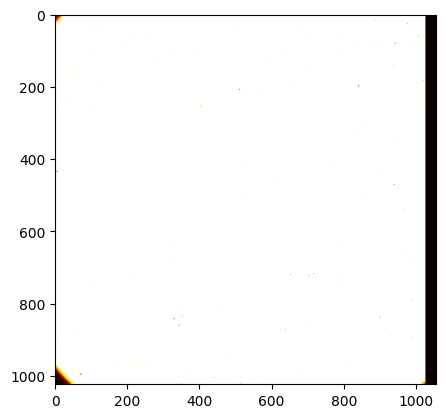

In [176]:
allframes = bias_sub(frames)
np.shape(allframes)
plt.imshow(fits.getdata(frames[-6]), cmap='hot')
plt.show()

# Exposure Frames

In [177]:
def exp_frames(x):
    tot = []
    for i in range(0,len(x),5):
        tot.append(x[i])
    return tot

exp_frames = exp_frames(allframes)


# Histograms

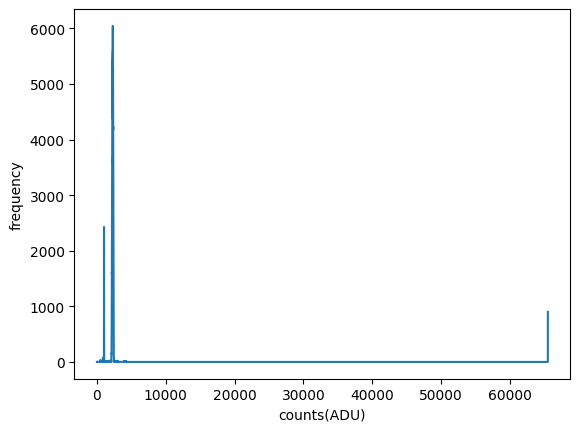

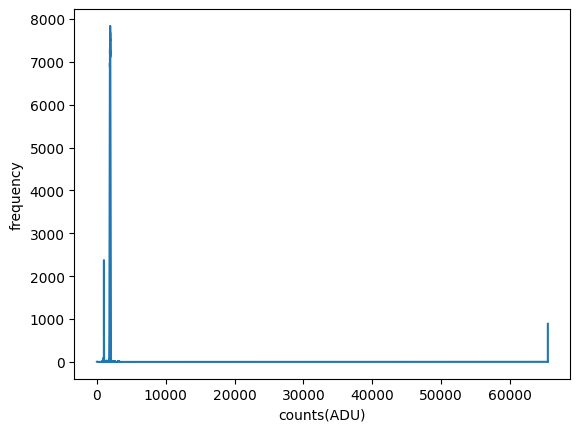

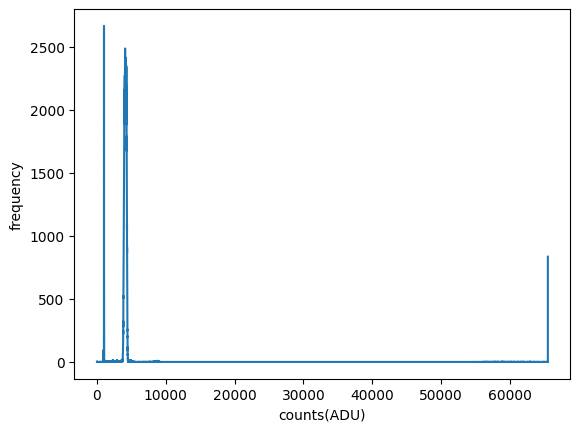

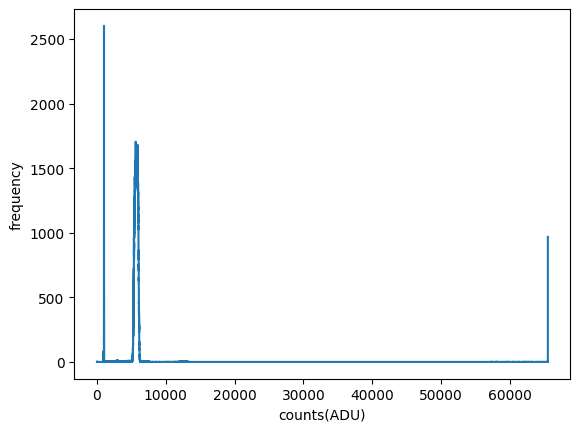

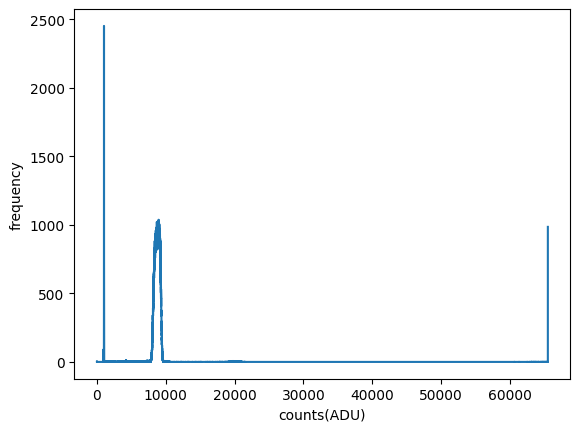

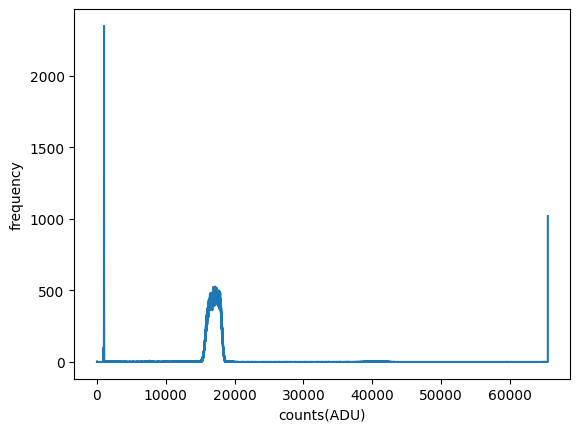

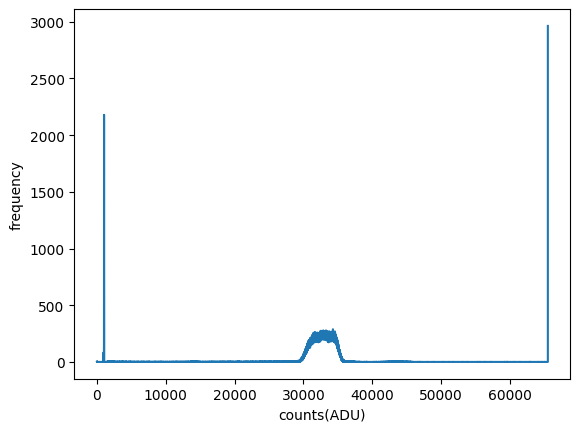

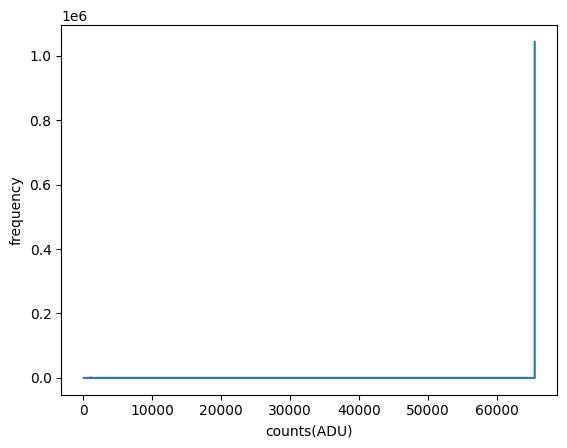

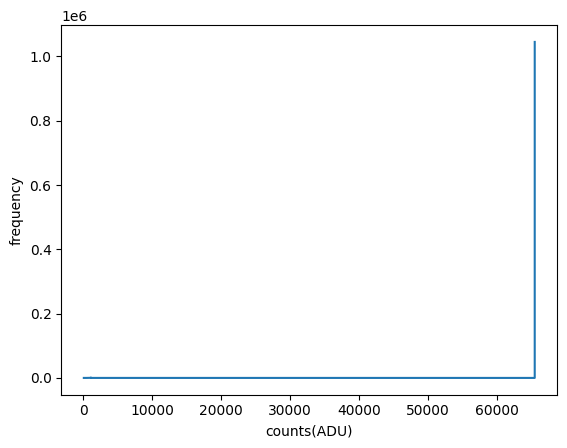

In [178]:
def histogram(x): # Function for creating a histogram of the desired filename

    farr = x.flatten()

    hmin = int(farr.min())
    hmax = int(farr.max())

    # initialize bins and empty count x[i]
    hr = np.arange(hmin, hmax + 1)
    hist = np.zeros(hmax - hmin + 1, dtype=int)

    # count each value in bins
    for value in farr:
        if hmin <= value <= hmax:
            hist[int(value - hmin)] += 1



    plt.plot(hr,hist)
    plt.xlabel('counts(ADU)')
    plt.ylabel('frequency')
    plt.show()

for x in exp_frames:
    histogram(x)

# Mean

In [198]:
def mean(x):

    tot = 0
    for i in x:
        tot += i

    sumtot = 0
    for j in tot:
        sumtot += j

    m =  sumtot/len(tot)
    return m

for x in exp_frames:
    print(mean(x))

55.316287878787875
29.051136363636363
34.571969696969695
9.739583333333334
32.15340909090909
43.09469696969697
18.540719696969695
54.229166666666664
46.29261363636363


/var/folders/85/g1dhcfl16zj89wp16k8k6bym0000gn/T/ipykernel_19586/3583831943.py:10: RuntimeWarning: overflow encountered in scalar add
  sumtot += j


# Standard Deviation

In [205]:
def std(x): # take an empty array and spit out an array with the mean counts of one image of each exposure time

    m = mean(x)
    tot = 0
    for i in x:
        tot += i
        for j in tot:
            tot += (i-m)**2

    return (tot/len(x))**0.5

for x in exp_frames:
    print(std(x))

[3853.22035678 2168.12925414 2102.51192526 ...  972.42588084  972.41390034
  972.68606809]
[3028.70095414 1838.23597854 1791.01374386 ... 2273.24241476 2273.19365475
 2273.12504755]
[8178.78741081 3971.38712694 3804.50701182 ...  990.64474798  990.45102328
  990.29521792]
[11910.23720535  5534.38300644  5282.21691891 ...  1013.71675249
  1013.54438894  1013.67149188]
[18999.18282353  8465.46645357  8045.33417042 ...   993.08077497
   993.0033936    993.22965826]
[38186.75369512 16469.00576655 15599.73150576 ...   985.79434062
   985.71209464   985.84433362]
[63055.46712036 31830.60041108 30095.17762318 ...  1023.67837305
  1023.55381567  1023.38414501]
[63574.21616007 63126.73741199 63146.08562697 ...  1025.15917268
  1024.8153455   1024.68005998]
[63764.38982971 63514.08674234 63563.96786965 ...  1082.27905929
  1081.80644733  1080.73713828]


/var/folders/85/g1dhcfl16zj89wp16k8k6bym0000gn/T/ipykernel_19586/3583831943.py:10: RuntimeWarning: overflow encountered in scalar add
  sumtot += j


In [46]:
y = xbar.flatten()
mom = np.sum(y)/np.size(y)
print(mom)

18594.121080265486


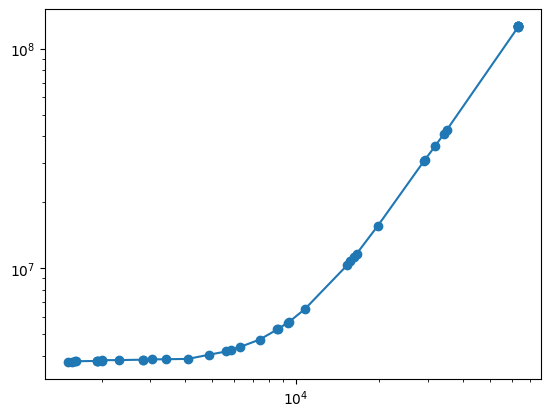

In [56]:
fig, ax = plt.subplots()
xbar.sort()
s.sort()
ax.plot(xbar,s**2,'-o')
#ax.plot(xline,yline,'-')
plt.yscale('log')
plt.xscale('log')
plt.show()